<a href="https://colab.research.google.com/github/claramarto11/AAvanceproject/blob/Jo%C3%A3o-Alex/Projeto_CM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Advanced Automation Project
##Spotify Recommendation System 

**Grupo 17**


*   89855 - Ana Rita Otero
*   90518 - João Passô
*   93502 - Clara Marto
*   96413 - João Alexandre 

In [105]:
!pip install requests
!pip install spotipy

import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
import pandas as pd
import os
import base64
from requests import post, get
import json
import csv
import re
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
import sklearn
from sklearn.tree import DecisionTreeClassifier  # Import Decision Tree Classifier
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [106]:
#Authentication 

idj= "011d29dea2f644f78b4f5368ba0d317e"
secretj= "86b22acbd4bf498591b038d69adea504"

client_credentials_manager = SpotifyClientCredentials(client_id=idj, client_secret=secretj)
spj = spotipy.Spotify(client_credentials_manager = client_credentials_manager)

playlist_link1 = "https://open.spotify.com/playlist/1mXeUy5gxuy8juz2oiL5H6?si=537119c577b7402c"
playlist_id1 = playlist_link1.split("/")[-1].split("?")[0]

playlist_link0 = "https://open.spotify.com/playlist/0taMcedcWUKNvRKicX09ZX?si=2c702c6b8a3d44b1"
playlist_id0 = playlist_link0.split("/")[-1].split("?")[0]

idr= "295795f897a34beea5e5647da3e24aed"
secretr= "f83912f9833f4d08a4adff6aa6e737c0"

client_credentials_manager = SpotifyClientCredentials(client_id=idr, client_secret=secretr)
spr = spotipy.Spotify(client_credentials_manager = client_credentials_manager)

playlist_linkrita = "https://open.spotify.com/playlist/29sYKlIhyolbVhyudK5q5R?si=202a07665e124cd8&pt=b7c7740f225a0ffc5cf5b2e0f98deda1"
playlist_idrita = playlist_linkrita.split("/")[-1].split("?")[0]

## Data

In [107]:
def call_playlistj(playlist_id):
    results = spj.playlist_tracks(playlist_id)
    tracks = results['items']
    while results['next']:
        results = spj.next(results)
        tracks.extend(results['items'])
    results = tracks    

    playlist_tracks_id = []
    playlist_tracks_titles = []
    playlist_tracks_artists = []
    playlist_tracks_first_artists = []
    playlist_tracks_first_release_date = []
    playlist_tracks_popularity = []

    for i in range(len(results)):
        if i == 0:
            playlist_tracks_id = results[i]['track']['id']
            playlist_tracks_titles = results[i]['track']['name']
            playlist_tracks_first_release_date = results[i]['track']['album']['release_date']
            playlist_tracks_popularity = results[i]['track']['popularity']

            artist_list = []
            for artist in results[i]['track']['artists']:
                artist_list= artist['name']
            playlist_tracks_artists = artist_list

            features = spj.audio_features(playlist_tracks_id)
            features_df = pd.DataFrame(data=features, columns=features[0].keys())
            features_df['title'] = playlist_tracks_titles
            features_df['all_artists'] = playlist_tracks_artists
            features_df['popularity'] = playlist_tracks_popularity
            features_df['release_date'] = playlist_tracks_first_release_date
            features_df = features_df[['id', 'title', 'all_artists', 'popularity', 'release_date',
                                       'danceability', 'energy', 'key', 'loudness',
                                       'mode', 'acousticness', 'instrumentalness',
                                       'liveness', 'valence', 'tempo',
                                       'duration_ms', 'time_signature']]
            continue
        else:
            try:
                playlist_tracks_id = results[i]['track']['id']
                playlist_tracks_titles = results[i]['track']['name']
                playlist_tracks_first_release_date = results[i]['track']['album']['release_date']
                playlist_tracks_popularity = results[i]['track']['popularity']
                artist_list = []
                for artist in results[i]['track']['artists']:
                    artist_list= artist['name']
                playlist_tracks_artists = artist_list
                features = spj.audio_features(playlist_tracks_id)
                new_row = {'id':[playlist_tracks_id],
               'title':[playlist_tracks_titles],
               'all_artists':[playlist_tracks_artists],
               'popularity':[playlist_tracks_popularity],
               'release_date':[playlist_tracks_first_release_date],
               'danceability':[features[0]['danceability']],
               'energy':[features[0]['energy']],
               'key':[features[0]['key']],
               'loudness':[features[0]['loudness']],
               'mode':[features[0]['mode']],
               'acousticness':[features[0]['acousticness']],
               'instrumentalness':[features[0]['instrumentalness']],
               'liveness':[features[0]['liveness']],
               'valence':[features[0]['valence']],
               'tempo':[features[0]['tempo']],
               'duration_ms':[features[0]['duration_ms']],
               'time_signature':[features[0]['time_signature']]
               }

                dfs = [features_df, pd.DataFrame(new_row)]
                features_df = pd.concat(dfs, ignore_index = True)
            except:
                continue
                
    return features_df

In [108]:
def call_playlistr(playlist_id):
    results = spr.playlist_tracks(playlist_id)
    tracks = results['items']
    while results['next']:
        results = spr.next(results)
        tracks.extend(results['items'])
    results = tracks    

    playlist_tracks_id = []
    playlist_tracks_titles = []
    playlist_tracks_artists = []
    playlist_tracks_first_artists = []
    playlist_tracks_first_release_date = []
    playlist_tracks_popularity = []

    for i in range(len(results)):
        if i == 0:
            playlist_tracks_id = results[i]['track']['id']
            playlist_tracks_titles = results[i]['track']['name']
            playlist_tracks_first_release_date = results[i]['track']['album']['release_date']
            playlist_tracks_popularity = results[i]['track']['popularity']

            artist_list = []
            for artist in results[i]['track']['artists']:
                artist_list= artist['name']
            playlist_tracks_artists = artist_list

            features = spr.audio_features(playlist_tracks_id)
            features_df = pd.DataFrame(data=features, columns=features[0].keys())
            features_df['title'] = playlist_tracks_titles
            features_df['all_artists'] = playlist_tracks_artists
            features_df['popularity'] = playlist_tracks_popularity
            features_df['release_date'] = playlist_tracks_first_release_date
            features_df = features_df[['id', 'title', 'all_artists', 'popularity', 'release_date',
                                       'danceability', 'energy', 'key', 'loudness',
                                       'mode', 'acousticness', 'instrumentalness',
                                       'liveness', 'valence', 'tempo',
                                       'duration_ms', 'time_signature']]
            continue
        else:
            try:
                playlist_tracks_id = results[i]['track']['id']
                playlist_tracks_titles = results[i]['track']['name']
                playlist_tracks_first_release_date = results[i]['track']['album']['release_date']
                playlist_tracks_popularity = results[i]['track']['popularity']
                artist_list = []
                for artist in results[i]['track']['artists']:
                    artist_list= artist['name']
                playlist_tracks_artists = artist_list
                features = spr.audio_features(playlist_tracks_id)
                new_row = {'id':[playlist_tracks_id],
               'title':[playlist_tracks_titles],
               'all_artists':[playlist_tracks_artists],
               'popularity':[playlist_tracks_popularity],
               'release_date':[playlist_tracks_first_release_date],
               'danceability':[features[0]['danceability']],
               'energy':[features[0]['energy']],
               'key':[features[0]['key']],
               'loudness':[features[0]['loudness']],
               'mode':[features[0]['mode']],
               'acousticness':[features[0]['acousticness']],
               'instrumentalness':[features[0]['instrumentalness']],
               'liveness':[features[0]['liveness']],
               'valence':[features[0]['valence']],
               'tempo':[features[0]['tempo']],
               'duration_ms':[features[0]['duration_ms']],
               'time_signature':[features[0]['time_signature']]
               }

                dfs = [features_df, pd.DataFrame(new_row)]
                features_df = pd.concat(dfs, ignore_index = True)
            except:
                continue
                
    return features_df

In [109]:
df1r=call_playlistr(playlist_idrita)
df1r.to_csv('Playlist_rita_1.csv')
df1r

df1j=call_playlistj(playlist_id1)
df1j.to_csv('Playlist_joao_1.csv')
#df1j

df0j=call_playlistj(playlist_id0)
df0j.to_csv('Playlist_joao_0.csv')
#df0j

In [110]:
#for i in range(len(df1r)):
#  for j in range(len(df0j)):
#    if df1r['id'][i]==df0j['id'][j]:
#      print(i)
#      continue      

In [111]:
#for i in range(len(df1r)):
#  for k in range(len(df1j)):
#    if df1r['id'][i]==df1j['id'][k]:
#      print(i)
#      continue      

In [112]:
df0r= pd.concat([df1j, df0j])
df0r.to_csv('Playlist_rita_0.csv')
df0r

,id,title,all_artists,popularity,release_date,danceability,energy,key,loudness,mode,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,0pNeVovbiZHkulpGeOx1Gj,Something - Remastered 2009,The Beatles,73,1969-09-26,0.396,0.338,0,-10.872,1,0.19800,0.000003,0.1380,0.377,133.522,182293,4
1,2mxByJWOajjiVsLWjNXvDJ,Oh! Darling - Remastered 2009,The Beatles,68,1969-09-26,0.422,0.656,4,-8.412,1,0.01260,0.027900,0.2680,0.549,173.930,207240,3
2,0suLngfo7rJoetk7Ub6N8l,Octopus's Garden - Remastered 2009,The Beatles,66,1969-09-26,0.626,0.512,1,-9.150,0,0.15500,0.000046,0.2150,0.730,92.225,170720,4
3,3Z25k4ZF6QENy2d9YatsM5,I Want You (She's So Heavy) - Remastered 2009,The Beatles,63,1969-09-26,0.370,0.515,2,-9.487,0,0.02330,0.205000,0.0966,0.420,115.732,467320,4
4,3oEo8Pqm5IAi8wQfCI5BpR,Yellow Submarine - Remastered 2009,The Beatles,47,1969-01-17,0.605,0.536,1,-10.069,1,0.51800,0.000000,0.5280,0.688,110.849,159720,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140,2rIMlCvI8R3NiMHDmT3NH9,A Próxima Viagem,Cassete Pirata,0,2020-02-01,0.454,0.567,2,-6.317,0,0.03950,0.000877,0.3160,0.382,149.958,214079,4
141,22qEkskBVTRiuF3utjqTTF,Sem Ar,Cassete Pirata,0,2020-02-01,0.589,0.573,0,-7.727,1,0.00244,0.261000,0.1370,0.542,140.064,277093,4
142,0o2ODr6zCp6DZdTczHsGSv,David Bentley: In A Broken Dream (2008),Python Lee Jackson,29,2009,0.539,0.214,4,-12.889,0,0.76800,0.018600,0.1160,0.255,80.119,223000,4
143,0HsJSLDb0WeBhLbN8H53M8,Backflip,jaymeso,0,2021-09-21,0.656,0.881,0,-5.059,1,0.39000,0.000010,0.1400,0.346,149.846,210825,4


In [113]:
vector = np.arange(0, len(df0r))
df0r=df0r.set_axis(vector, axis='index', inplace=False)

In [114]:
df1r.drop([128,210,243,253,436,437,438,463,488], axis=0, inplace=True)

In [115]:
vector1 = np.arange(0, len(df1r))
df1r=df1r.set_axis(vector1, axis='index', inplace=False)

In [116]:
df1r.drop(['id'], axis=1)
df0r.drop(['id'], axis=1)

,title,all_artists,popularity,release_date,danceability,energy,key,loudness,mode,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,Something - Remastered 2009,The Beatles,73,1969-09-26,0.396,0.338,0,-10.872,1,0.19800,0.000003,0.1380,0.377,133.522,182293,4
1,Oh! Darling - Remastered 2009,The Beatles,68,1969-09-26,0.422,0.656,4,-8.412,1,0.01260,0.027900,0.2680,0.549,173.930,207240,3
2,Octopus's Garden - Remastered 2009,The Beatles,66,1969-09-26,0.626,0.512,1,-9.150,0,0.15500,0.000046,0.2150,0.730,92.225,170720,4
3,I Want You (She's So Heavy) - Remastered 2009,The Beatles,63,1969-09-26,0.370,0.515,2,-9.487,0,0.02330,0.205000,0.0966,0.420,115.732,467320,4
4,Yellow Submarine - Remastered 2009,The Beatles,47,1969-01-17,0.605,0.536,1,-10.069,1,0.51800,0.000000,0.5280,0.688,110.849,159720,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
481,A Próxima Viagem,Cassete Pirata,0,2020-02-01,0.454,0.567,2,-6.317,0,0.03950,0.000877,0.3160,0.382,149.958,214079,4
482,Sem Ar,Cassete Pirata,0,2020-02-01,0.589,0.573,0,-7.727,1,0.00244,0.261000,0.1370,0.542,140.064,277093,4
483,David Bentley: In A Broken Dream (2008),Python Lee Jackson,29,2009,0.539,0.214,4,-12.889,0,0.76800,0.018600,0.1160,0.255,80.119,223000,4
484,Backflip,jaymeso,0,2021-09-21,0.656,0.881,0,-5.059,1,0.39000,0.000010,0.1400,0.346,149.846,210825,4


In [117]:
df0r

,id,title,all_artists,popularity,release_date,danceability,energy,key,loudness,mode,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,0pNeVovbiZHkulpGeOx1Gj,Something - Remastered 2009,The Beatles,73,1969-09-26,0.396,0.338,0,-10.872,1,0.19800,0.000003,0.1380,0.377,133.522,182293,4
1,2mxByJWOajjiVsLWjNXvDJ,Oh! Darling - Remastered 2009,The Beatles,68,1969-09-26,0.422,0.656,4,-8.412,1,0.01260,0.027900,0.2680,0.549,173.930,207240,3
2,0suLngfo7rJoetk7Ub6N8l,Octopus's Garden - Remastered 2009,The Beatles,66,1969-09-26,0.626,0.512,1,-9.150,0,0.15500,0.000046,0.2150,0.730,92.225,170720,4
3,3Z25k4ZF6QENy2d9YatsM5,I Want You (She's So Heavy) - Remastered 2009,The Beatles,63,1969-09-26,0.370,0.515,2,-9.487,0,0.02330,0.205000,0.0966,0.420,115.732,467320,4
4,3oEo8Pqm5IAi8wQfCI5BpR,Yellow Submarine - Remastered 2009,The Beatles,47,1969-01-17,0.605,0.536,1,-10.069,1,0.51800,0.000000,0.5280,0.688,110.849,159720,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
481,2rIMlCvI8R3NiMHDmT3NH9,A Próxima Viagem,Cassete Pirata,0,2020-02-01,0.454,0.567,2,-6.317,0,0.03950,0.000877,0.3160,0.382,149.958,214079,4
482,22qEkskBVTRiuF3utjqTTF,Sem Ar,Cassete Pirata,0,2020-02-01,0.589,0.573,0,-7.727,1,0.00244,0.261000,0.1370,0.542,140.064,277093,4
483,0o2ODr6zCp6DZdTczHsGSv,David Bentley: In A Broken Dream (2008),Python Lee Jackson,29,2009,0.539,0.214,4,-12.889,0,0.76800,0.018600,0.1160,0.255,80.119,223000,4
484,0HsJSLDb0WeBhLbN8H53M8,Backflip,jaymeso,0,2021-09-21,0.656,0.881,0,-5.059,1,0.39000,0.000010,0.1400,0.346,149.846,210825,4


In [118]:
df1r

,id,title,all_artists,popularity,release_date,danceability,energy,key,loudness,mode,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,3h04eZTnmFLRMjZajbrp2R,Need You Tonight,INXS,75,1987,0.795,0.630,10,-7.217,0,0.04190,0.575000,0.0894,0.785,108.701,181107,4
1,3SQ9Hb9rfpJ02AWfaOPhpy,"It's A Man's, Man's, Man's World",James Brown & The Famous Flames,65,1966-01-01,0.539,0.240,3,-16.632,0,0.68700,0.000051,0.1330,0.567,80.816,167373,3
2,6RUKPb4LETWmmr3iAEQktW,Something Just Like This,Coldplay,86,2017-04-07,0.617,0.635,11,-6.769,0,0.04980,0.000014,0.1640,0.446,103.019,247160,4
3,6lL3GA2rq8UvdvjMdp2H5g,Actions,John Legend,42,2020-06-19,0.572,0.898,9,-3.661,0,0.15400,0.000000,0.2320,0.494,82.934,174133,4
4,2cY8x0jQ1wWEipUCouclsD,What You Do to Me,John Legend,37,2016-12-02,0.447,0.781,9,-3.469,0,0.05640,0.000000,0.2040,0.740,144.530,201387,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
667,3iZZAEx3R8pYNNdiIZ8HEs,Always,Bon Jovi,42,2010-11-09,0.381,0.665,4,-5.556,1,0.13500,0.000000,0.1070,0.329,143.448,353107,4
668,3U3FEk6xlkLa9TsijsZAiW,Lay Your Hands On Me,Bon Jovi,37,2010-11-09,0.340,0.963,2,-3.830,1,0.19200,0.000000,0.1510,0.371,100.313,229293,4
669,68l9gMSvLerIxE0irCTl8P,In These Arms,Bon Jovi,39,2010-11-09,0.509,0.918,4,-2.981,1,0.01040,0.000017,0.2050,0.439,123.279,319293,4
670,3M9Apu4OZfylLTFKvgEtKa,Ritual,Rita Ora,68,2019-05-31,0.647,0.726,3,-4.389,0,0.15700,0.000000,0.0844,0.767,114.996,198996,4


In [119]:
df0r['Ratings'] = 0
df1r['Ratings'] = 1

In [120]:
df0r

,id,title,all_artists,popularity,release_date,danceability,energy,key,loudness,mode,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,Ratings
0,0pNeVovbiZHkulpGeOx1Gj,Something - Remastered 2009,The Beatles,73,1969-09-26,0.396,0.338,0,-10.872,1,0.19800,0.000003,0.1380,0.377,133.522,182293,4,0
1,2mxByJWOajjiVsLWjNXvDJ,Oh! Darling - Remastered 2009,The Beatles,68,1969-09-26,0.422,0.656,4,-8.412,1,0.01260,0.027900,0.2680,0.549,173.930,207240,3,0
2,0suLngfo7rJoetk7Ub6N8l,Octopus's Garden - Remastered 2009,The Beatles,66,1969-09-26,0.626,0.512,1,-9.150,0,0.15500,0.000046,0.2150,0.730,92.225,170720,4,0
3,3Z25k4ZF6QENy2d9YatsM5,I Want You (She's So Heavy) - Remastered 2009,The Beatles,63,1969-09-26,0.370,0.515,2,-9.487,0,0.02330,0.205000,0.0966,0.420,115.732,467320,4,0
4,3oEo8Pqm5IAi8wQfCI5BpR,Yellow Submarine - Remastered 2009,The Beatles,47,1969-01-17,0.605,0.536,1,-10.069,1,0.51800,0.000000,0.5280,0.688,110.849,159720,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
481,2rIMlCvI8R3NiMHDmT3NH9,A Próxima Viagem,Cassete Pirata,0,2020-02-01,0.454,0.567,2,-6.317,0,0.03950,0.000877,0.3160,0.382,149.958,214079,4,0
482,22qEkskBVTRiuF3utjqTTF,Sem Ar,Cassete Pirata,0,2020-02-01,0.589,0.573,0,-7.727,1,0.00244,0.261000,0.1370,0.542,140.064,277093,4,0
483,0o2ODr6zCp6DZdTczHsGSv,David Bentley: In A Broken Dream (2008),Python Lee Jackson,29,2009,0.539,0.214,4,-12.889,0,0.76800,0.018600,0.1160,0.255,80.119,223000,4,0
484,0HsJSLDb0WeBhLbN8H53M8,Backflip,jaymeso,0,2021-09-21,0.656,0.881,0,-5.059,1,0.39000,0.000010,0.1400,0.346,149.846,210825,4,0


In [121]:
df01 = pd.concat([df1r,df0r]).drop_duplicates().reset_index(drop=True)
df01

,id,title,all_artists,popularity,release_date,danceability,energy,key,loudness,mode,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,Ratings
0,3h04eZTnmFLRMjZajbrp2R,Need You Tonight,INXS,75,1987,0.795,0.630,10,-7.217,0,0.04190,0.575000,0.0894,0.785,108.701,181107,4,1
1,3SQ9Hb9rfpJ02AWfaOPhpy,"It's A Man's, Man's, Man's World",James Brown & The Famous Flames,65,1966-01-01,0.539,0.240,3,-16.632,0,0.68700,0.000051,0.1330,0.567,80.816,167373,3,1
2,6RUKPb4LETWmmr3iAEQktW,Something Just Like This,Coldplay,86,2017-04-07,0.617,0.635,11,-6.769,0,0.04980,0.000014,0.1640,0.446,103.019,247160,4,1
3,6lL3GA2rq8UvdvjMdp2H5g,Actions,John Legend,42,2020-06-19,0.572,0.898,9,-3.661,0,0.15400,0.000000,0.2320,0.494,82.934,174133,4,1
4,2cY8x0jQ1wWEipUCouclsD,What You Do to Me,John Legend,37,2016-12-02,0.447,0.781,9,-3.469,0,0.05640,0.000000,0.2040,0.740,144.530,201387,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1148,1i6N76fftMZhijOzFQ5ZtL,Psycho Killer - 2005 Remaster,Talking Heads,78,1977-09-16,0.721,0.521,2,-8.123,1,0.07080,0.005450,0.1270,0.942,123.118,261413,4,0
1149,2rIMlCvI8R3NiMHDmT3NH9,A Próxima Viagem,Cassete Pirata,0,2020-02-01,0.454,0.567,2,-6.317,0,0.03950,0.000877,0.3160,0.382,149.958,214079,4,0
1150,22qEkskBVTRiuF3utjqTTF,Sem Ar,Cassete Pirata,0,2020-02-01,0.589,0.573,0,-7.727,1,0.00244,0.261000,0.1370,0.542,140.064,277093,4,0
1151,0HsJSLDb0WeBhLbN8H53M8,Backflip,jaymeso,0,2021-09-21,0.656,0.881,0,-5.059,1,0.39000,0.000010,0.1400,0.346,149.846,210825,4,0


## Correlation Matrix

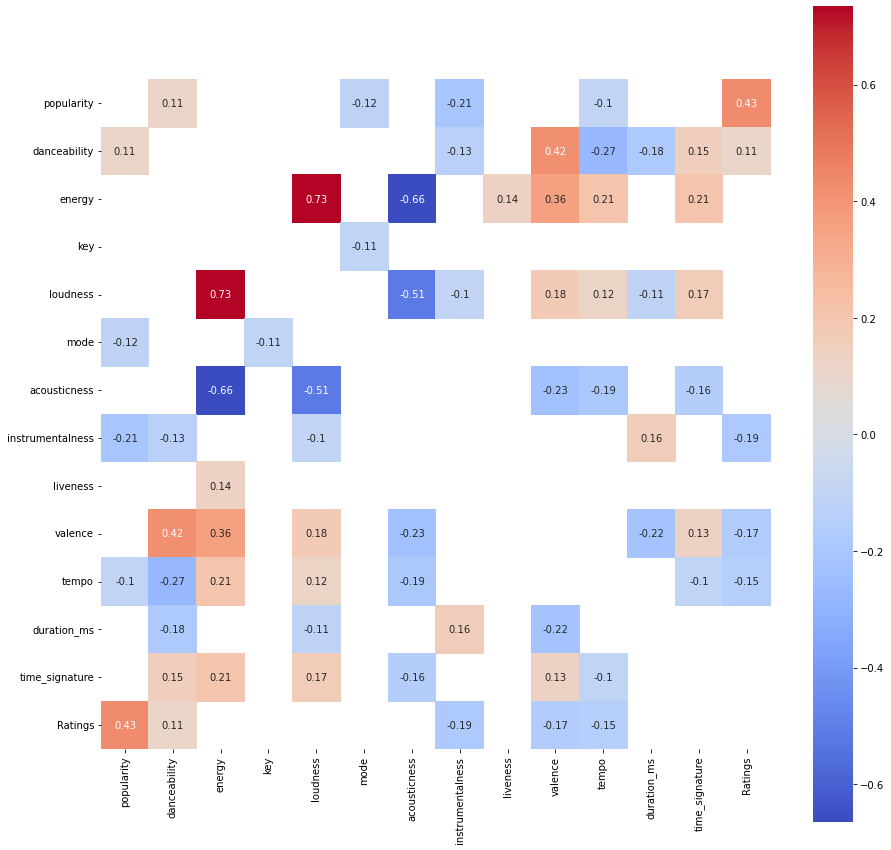

In [122]:
## Import pearsonr function from scipy -- calculate the correlation and p-value between two columns
from scipy.stats import pearsonr

## Calculate the correlations between the columns
df01_corrs = df01.corr(method='pearson')

## Calculate the p-value, as the second element of the response from the pearsonr function. 
pval = df01.corr(method=lambda x, y: pearsonr(x, y)[1])

## Establish the mask, to hide values without a given statistical significance
ptg_stat_sig = 0.1/100
mask = pval > ptg_stat_sig

## Plot the correlation matrix using seaborn's heatmap function
plt.subplots(figsize=(15, 15))
heatmap = sns.heatmap(df01_corrs, mask = mask, square = True, cmap = 'coolwarm', annot = True)

In [123]:
from sklearn.model_selection import train_test_split

test_ptg = 0.3
seed = 100
X = df01[['popularity', 'danceability', 'energy', 'loudness', 'acousticness', 'instrumentalness', 'liveness', 'valence']]
y = df01['Ratings']
X_train, X_test, y_train, y_test = \
    train_test_split(X, y, test_size=test_ptg, random_state=seed)

## Logistic Regression

In [124]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

model = LogisticRegression(max_iter = 1000)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

print ('\n' + 'Real'.rjust(23))
print ('{} | {}'.format('0'.rjust(19), '1'))
print ('{}:  {} | {}'.format('Previsto 0'.rjust(14), cm[0,0], cm[1,0]))
print ('{}:  {} | {}'.format('Previsto 1'.rjust(14), cm[0,1], cm[1,1]))
print ('Success Rate: {:.2f}%'.format(accuracy_score(y_pred, y_test)*100))



                   Real
                  0 | 1
    Previsto 0:  77 | 64
    Previsto 1:  50 | 155
Success Rate: 67.05%


## KNN

K Value: 1 -- Test Error: 33.24%
K Value: 2 -- Test Error: 38.15%
K Value: 3 -- Test Error: 30.06%
K Value: 4 -- Test Error: 33.82%
K Value: 5 -- Test Error: 28.90%
K Value: 6 -- Test Error: 30.06%
K Value: 7 -- Test Error: 27.17%
K Value: 8 -- Test Error: 27.75%
K Value: 9 -- Test Error: 25.43%
K Value: 10 -- Test Error: 27.46%
K Value: 11 -- Test Error: 27.17%
K Value: 12 -- Test Error: 27.75%
K Value: 13 -- Test Error: 26.59%
K Value: 14 -- Test Error: 26.59%
K Value: 15 -- Test Error: 25.43%
K Value: 16 -- Test Error: 26.30%
K Value: 17 -- Test Error: 25.72%
K Value: 18 -- Test Error: 27.75%
K Value: 19 -- Test Error: 25.14%
K Value: 20 -- Test Error: 25.72%


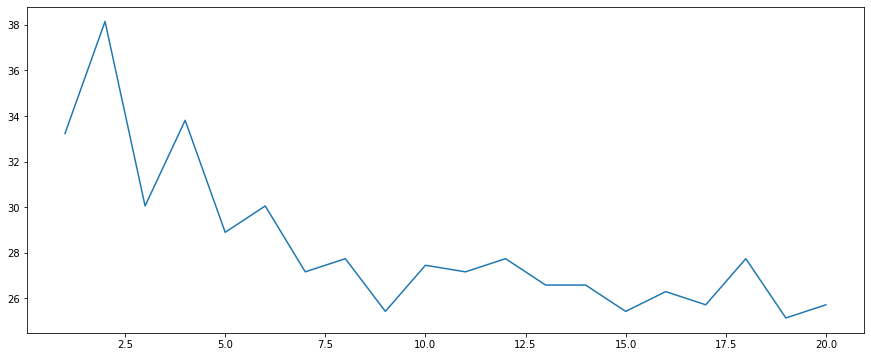

In [125]:
from sklearn.neighbors import KNeighborsClassifier

def KNN_fit(X_train, X_test, y_train, y_test, n_neighbors):

  model = KNeighborsClassifier(n_neighbors=n_neighbors)
  model.fit(X_train, y_train)

  y_pred = model.predict(X_test)
  cm = confusion_matrix(y_test, y_pred)
  error_val = 100 - accuracy_score(y_pred, y_test)*100
  print('K Value: {} -- Test Error: {:.2f}%'.format(n_neighbors, error_val))

  return model, error_val

errors = []
n_tests = 20
for i in range(n_tests):
  _, error_val = KNN_fit(X_train, X_test, y_train, y_test, n_neighbors=i+1)
  errors.append(error_val)

plt.subplots(figsize=(15, 6))
plt.plot(range(1,n_tests+1), errors)
plt.show()

## Decision Tree

In [126]:
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.6820809248554913


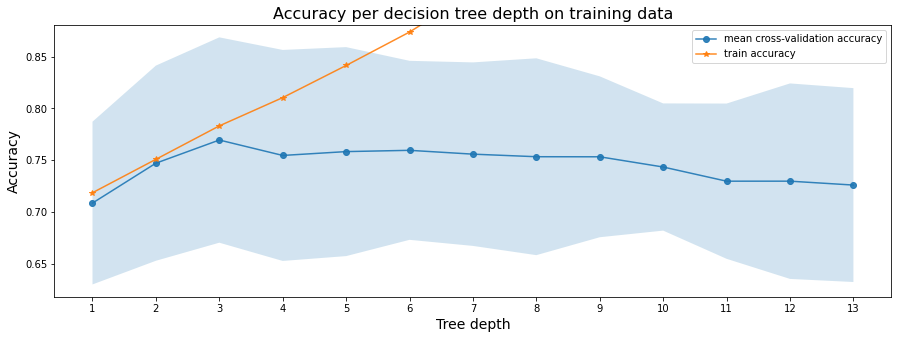

In [127]:
from sklearn.model_selection import cross_val_score

# function for fitting trees of various depths on the training data using cross-validation
def run_cross_validation_on_trees(X, y, tree_depths, cv=5, scoring='accuracy'):
    cv_scores_list = []
    cv_scores_std = []
    cv_scores_mean = []
    accuracy_scores = []
    for depth in tree_depths:
        tree_model = DecisionTreeClassifier(max_depth=depth)
        cv_scores = cross_val_score(tree_model, X, y, cv=cv, scoring=scoring)
        cv_scores_list.append(cv_scores)
        cv_scores_mean.append(cv_scores.mean())
        cv_scores_std.append(cv_scores.std())
        accuracy_scores.append(tree_model.fit(X, y).score(X, y))
    cv_scores_mean = np.array(cv_scores_mean)
    cv_scores_std = np.array(cv_scores_std)
    accuracy_scores = np.array(accuracy_scores)
    return cv_scores_mean, cv_scores_std, accuracy_scores

# function for plotting cross-validation results
def plot_cross_validation_on_trees(depths, cv_scores_mean, cv_scores_std, accuracy_scores, title):
    fig, ax = plt.subplots(1,1, figsize=(15,5))
    ax.plot(depths, cv_scores_mean, '-o', label='mean cross-validation accuracy', alpha=0.9)
    ax.fill_between(depths, cv_scores_mean-2*cv_scores_std, cv_scores_mean+2*cv_scores_std, alpha=0.2)
    ylim = plt.ylim()
    ax.plot(depths, accuracy_scores, '-*', label='train accuracy', alpha=0.9)
    ax.set_title(title, fontsize=16)
    ax.set_xlabel('Tree depth', fontsize=14)
    ax.set_ylabel('Accuracy', fontsize=14)
    ax.set_ylim(ylim)
    ax.set_xticks(depths)
    ax.legend()


# fitting trees of depth 1 to 14
sm_tree_depths = range(1,14)
sm_cv_scores_mean, sm_cv_scores_std, sm_accuracy_scores = run_cross_validation_on_trees(X_train, y_train, sm_tree_depths)


# plotting accuracy
plot_cross_validation_on_trees(sm_tree_depths, sm_cv_scores_mean, sm_cv_scores_std, sm_accuracy_scores,'Accuracy per decision tree depth on training data')


In [128]:
idx_max = sm_cv_scores_mean.argmax()
sm_best_tree_depth = sm_tree_depths[idx_max]
sm_best_tree_cv_score = sm_cv_scores_mean[idx_max]
sm_best_tree_cv_score_std = sm_cv_scores_std[idx_max]
print('The depth-{} tree achieves the best mean cross-validation accuracy {} +/- {}% on training dataset'.format(sm_best_tree_depth, round(sm_best_tree_cv_score*100,5), round(sm_best_tree_cv_score_std*100, 5)))


The depth-3 tree achieves the best mean cross-validation accuracy 76.95192 +/- 4.94818% on training dataset


In [129]:
# function for training and evaluating a tree
def run_single_tree(X_train, y_train, X_test, y_test, depth):
    model = DecisionTreeClassifier(max_depth=depth).fit(X_train, y_train)
    accuracy_train = model.score(X_train, y_train)
    accuracy_test = model.score(X_test, y_test)
    print('Single tree depth: ', depth)
    print('Accuracy, Training Set: ', round(accuracy_train*100,5), '%')
    print('Accuracy, Test Set: ', round(accuracy_test*100,5), '%')
    return accuracy_train, accuracy_test
  

# train and evaluate a 3-depth tree
sm_best_tree_accuracy_train, sm_best_tree_accuracy_test = run_single_tree(X_train, y_train, 
                                                                          X_test, y_test, 
                                                                          sm_best_tree_depth)

Single tree depth:  3
Accuracy, Training Set:  78.31475 %
Accuracy, Test Set:  70.80925 %


## Random Forest

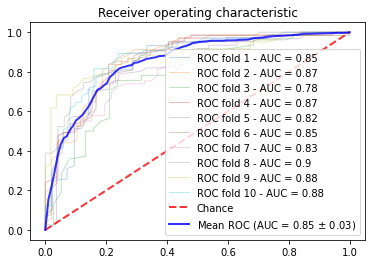

In [130]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import auc, roc_curve

# KFold cross validation with 10 folds
kfold = KFold(n_splits=10, shuffle=True, random_state=seed)

# Random Forest Classifier
clf_rfc = RandomForestClassifier(n_estimators=100, random_state=seed)


tprs = []
aucs = []

mean_fpr = np.linspace(0,1,100)

fig, ax = plt.subplots()

for i, (train,test) in enumerate(kfold.split(X,y)):
    clf_rfc.fit(X.loc[train], y[train])
    y_proba = clf_rfc.predict_proba(X.loc[test]) 
    fpr, tpr, _ = roc_curve(y[test], y_proba[:,1])
    
    interp_tpr = np.interp(mean_fpr, fpr, tpr)
    interp_tpr[0] = 0.0
    
    tprs.append(interp_tpr)
    aucs.append(auc(fpr,tpr))
    
    ax.plot(
        fpr, tpr,
        label='ROC fold ' + str(i+1) +  ' - AUC = ' + str(np.round(auc(fpr,tpr),2)),
        lw=1,
        alpha=0.3)

ax.plot([0, 1], [0, 1], linestyle="--", lw=2, color="r", label="Chance", alpha=0.8)

mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)

# Plot mean roc curve auc
ax.plot(
    mean_fpr,
    mean_tpr,
    color="b",
    label=r"Mean ROC (AUC = %0.2f $\pm$ %0.2f)" % (mean_auc, std_auc),
    lw=2,
    alpha=0.8,
)

ax.set(
    xlim=[-0.05, 1.05],
    ylim=[-0.05, 1.05],
    title="Receiver operating characteristic",
)

ax.legend(loc="lower right")
plt.show()

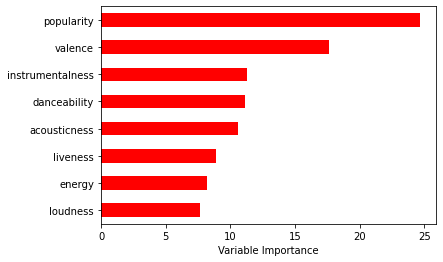

In [131]:
# Plot feature importance attribute of the Random Forest

importance = pd.DataFrame({'Importance':clf.feature_importances_*100}, 
                          index = X.columns)

importance.sort_values(by = 'Importance', 
                       axis = 0, 
                       ascending = True).plot(kind = 'barh', 
                                              color = 'red', )

plt.xlabel('Variable Importance')
plt.gca().legend_ = None

## Bagging Regressor

In [132]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

bagged_df = RandomForestRegressor(max_features= len(X.columns),
                                  random_state = seed)
bagged_df.fit(X_train, y_train)

y_pred = bagged_df.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error = ' + str(mse))

Mean Squared Error = 0.17639971098265897


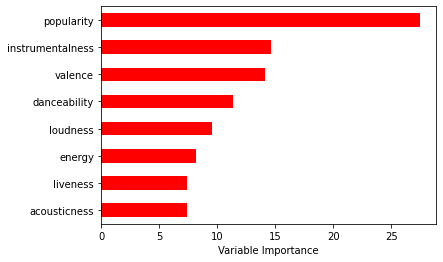

In [133]:
importance = pd.DataFrame({'Importance': bagged_df.feature_importances_*100},
                          index = X.columns)

importance.sort_values(by = 'Importance',
                       axis = 0,
                       ascending = True).plot(kind = 'barh',
                                             color = 'red', )

plt.xlabel('Variable Importance')
plt.gca().legend_ = None

## Gradient Boosting Regressor 

In [134]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.datasets import load_boston
from sklearn.metrics import mean_squared_error

boosted_boston = GradientBoostingRegressor(n_estimators = 100, 
                                           learning_rate = 0.05, 
                                           max_depth = 3, 
                                           random_state = 1)

boosted_boston.fit(X_train, y_train)

y_pred = boosted_boston.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("MSE: %.2f" % mse)
print("The best accuracy on training set: %.3f" % boosted_boston.score(X_train, y_train))
print("The best accuracy on test set: %.3f" % boosted_boston.score(X_test, y_test))

MSE: 0.17
The best accuracy on training set: 0.600
The best accuracy on test set: 0.262


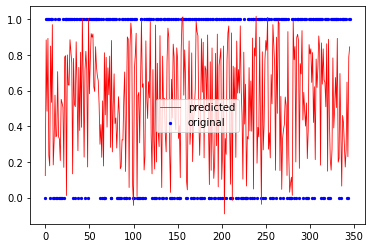

In [135]:
x_ax = range(len(y_test))
plt.scatter(x_ax, y_test, s=5, color="blue", label="original")
plt.plot(x_ax, y_pred, lw=0.8, color="red", label="predicted")
plt.legend()
plt.show()

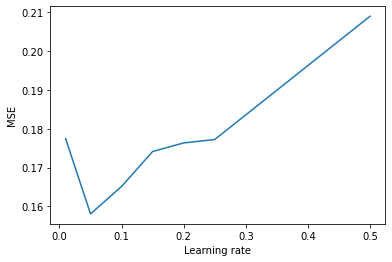

In [136]:
from sklearn.model_selection import GridSearchCV

tuned_parameters = [{'learning_rate': [0.01, 0.05, 0.1, 0.15, 0.2, 0.25, 0.5]}]
clf = GridSearchCV(GradientBoostingRegressor(), tuned_parameters, cv=10, scoring='neg_mean_squared_error')
clf.fit(X_train,y_train)

cv_results = pd.DataFrame(clf.cv_results_)
plt.plot(cv_results['param_learning_rate'], -1*cv_results['mean_test_score'])
plt.xlabel('Learning rate')
plt.ylabel('MSE')
plt.show()

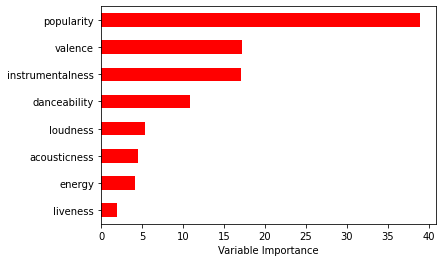

In [137]:
feature_importance = boosted_boston.feature_importances_*100

rel_imp = pd.Series(feature_importance, index = X.columns).sort_values(inplace = False)

rel_imp.T.plot(kind = 'barh', 
               color = 'r', )

plt.xlabel('Variable Importance')

plt.gca().legend_ = None

## Support Vector Machines

In [138]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [139]:
from sklearn.decomposition import PCA 
from sklearn.svm import SVC
pca = PCA(n_components=2)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

svm=SVC(C=1, kernel='linear', gamma=0.1)
svm.fit(X_train, y_train)

SVC(C=1, gamma=0.1, kernel='linear')

In [145]:
from sklearn.model_selection import GridSearchCV

parameters = [{'C':[0.01, 0.1, 1, 10, 50, 100, 500, 1000], 'kernel':['linear', 'rbf', 'poly'], 'gamma': [0.1, 0.125, 0.15, 0.17, 0.2]}]
grid_search = GridSearchCV(estimator=svm, param_grid=parameters, scoring = 'accuracy', cv=5, n_jobs=-1)
grid_search = grid_search.fit(X_train, y_train)

best_accuracy = grid_search.best_score_
opt_param = grid_search.best_params_

print('Best accuracy achieved: ', best_accuracy)
print('Optimal params: ', opt_param)

Best accuracy achieved:  0.6307261713058815
Optimal params:  {'C': 1, 'gamma': 0.125, 'kernel': 'rbf'}


In [141]:
from sklearn.svm import SVC

# Use the following formula in exercises
# Function to draw a nice plot of an SVM
def plot_svc(svc, X, y, h=0.02, pad=0.25):
    
    x_min, x_max = X[:, 0].min()-pad, X[:, 0].max()+pad
    y_min, y_max = X[:, 1].min()-pad, X[:, 1].max()+pad
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = svc.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.2)

    plt.scatter(X[:,0], X[:,1], s=70, c=y, cmap=mpl.cm.Paired)
    
    # Support vectors indicated in plot by vertical lines
    sv = svc.support_vectors_
    plt.scatter(sv[:,0], sv[:,1], c='k', marker='x', s=100, linewidths=1)
    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)
    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.show()
    print('Number of support vectors: ', svc.support_.size)

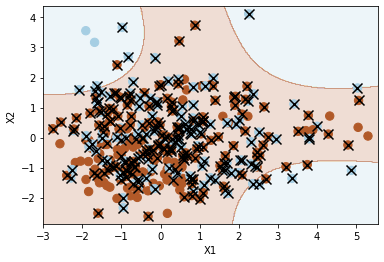

Number of support vectors:  260


In [146]:
import matplotlib as mpl
svc1 = SVC(C=10, kernel='rbf', gamma=0.125)
svc1.fit(X_test, y_test)
plot_svc(svc1, X_test, y_test)